This script is used to calibrate QuantAQ sensors.

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
from scipy.optimize import curve_fit
import scipy.stats as stats




In [78]:
# Import CSV file for each sensor
dfMod = pd.read_csv('calibrationOutdoor.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp = pd.read_csv('calibrationAlpha.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet = pd.read_csv('calibrationBeta.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

dfMod.index

print(dfMod['timestamp'][len(dfMod)-1])
print(dfAlp['timestamp'][len(dfMod)-1])
print(dfBet['timestamp'][len(dfMod)-1])



dfMod.index = dfMod.index.map(lambda x: x.replace(second=0))
dfAlp.index = dfAlp.index.map(lambda x: x.replace(second=0))
dfBet.index = dfBet.index.map(lambda x: x.replace(second=0))

# Find the common timestamps after rounding down the seconds
common_timestamps = dfMod.index.intersection(dfAlp.index).intersection(dfBet.index)

# Filter each DataFrame to keep only the rows with common timestamps
dfMod = dfMod[dfMod.index.isin(common_timestamps)]
dfAlp = dfAlp[dfAlp.index.isin(common_timestamps)]
dfBet = dfBet[dfBet.index.isin(common_timestamps)]


# Plot the data































2023-04-06T20:22:20Z
2023-04-06T20:40:09Z
2023-04-06T20:48:10Z
2023-04-06T19:00:43Z


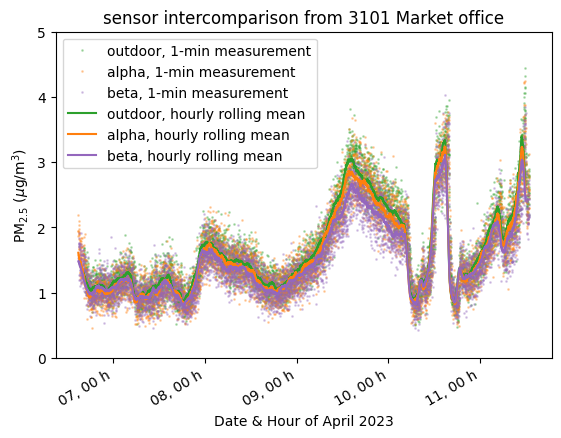

In [8]:
# Plot time series of one column
fig = plt.figure()
ax = plt.subplot(111)

dfMod['pm25'].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
dfAlp['pm25'].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='alpha, 1-min measurement', alpha=0.3)
dfBet['pm25'].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='beta, 1-min measurement', alpha=0.3)

dfMod['60 mean']=dfMod.pm25.rolling( 60).mean()
dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
dfAlp['60 mean']=dfAlp.pm25.rolling( 60).mean()
dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')
dfBet['60 mean']=dfBet.pm25.rolling( 60).mean()
dfBet['60 mean'].plot(color='tab:purple', label='beta, hourly rolling mean')

ax.legend()

plt.ylim((0,5))
ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
plt.xlabel('Date & Hour of April 2023')
plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
#plt.show()

plt.savefig('initialTimeseries.pdf',dpi=300,)

In [1]:
# Plot of pm1 concentration vs temperature for each sensor
ax1 = dfMod.plot(x="temp", y="pm1", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_temp", y="pm1", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_temp", y="pm1", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{temperature }\ (^\circ \mathrm{C})$')
plt.ylabel(r'$\mathrm{PM}_{1} (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

NameError: name 'dfMod' is not defined

6958
7053


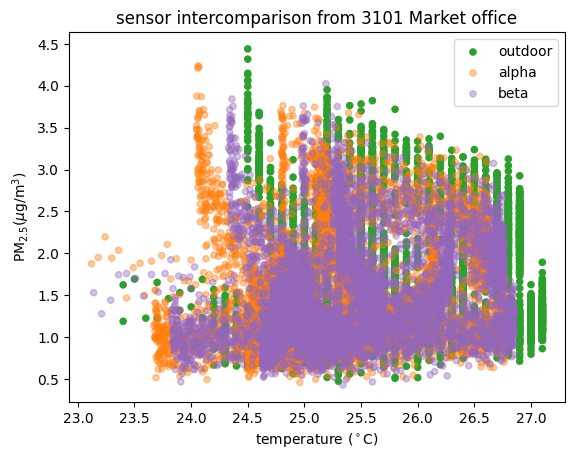

In [58]:
# Plot of pm2.5 concentration vs temperature for each sensor
ax1 = dfMod.plot(x="temp", y="pm25", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_temp", y="pm25", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_temp", y="pm25", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

print(len(dfMod['pm25']))
print(len(dfAlp['pm1']))



# Show the plot
plt.xlabel(r'$\mathrm{temperature }\ (^\circ \mathrm{C})$')
plt.ylabel(r'$\mathrm{PM}_{2.5} (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

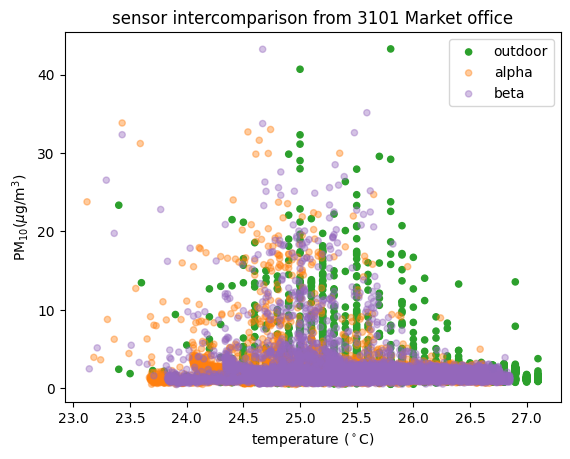

In [11]:
# Plot of pm10 concentration vs temperature for each sensor
ax1 = dfMod.plot(x="temp", y="pm10", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_temp", y="pm10", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_temp", y="pm10", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{temperature }\ (^\circ \mathrm{C})$')
plt.ylabel(r'$\mathrm{PM}_{10} (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

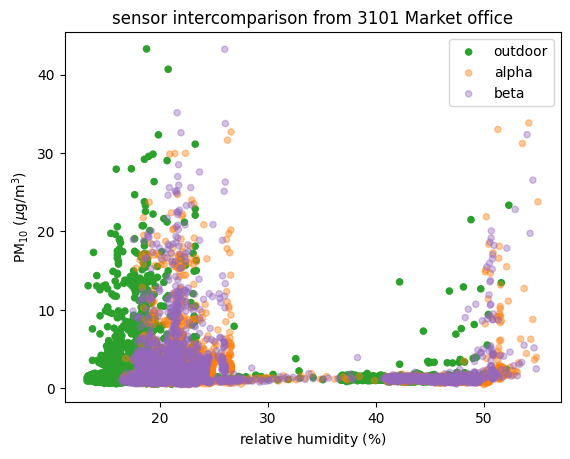

In [12]:
# plot of pm10 concentration vs relative humidity for each sensor
ax1 = dfMod.plot(x="rh", y="pm10", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_rh", y="pm10", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_rh", y="pm10", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
plt.ylabel(r'$\mathrm{PM}_{10}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

a = 0.8804471201210103 b = 0.11420680653831562
r2 = 0.8196462976594874


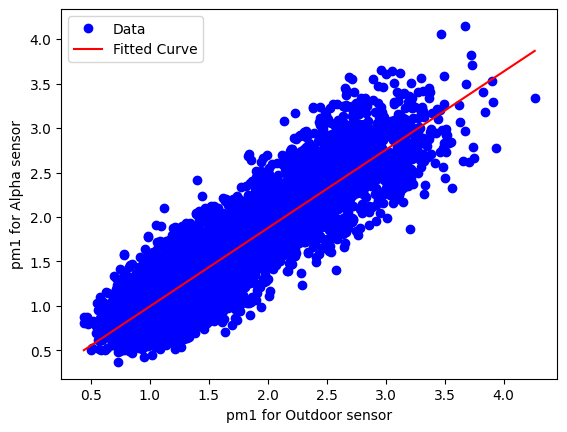

a = 0.7719212400682123 b = 0.21286600572018677
r2 = 0.7919211083412844


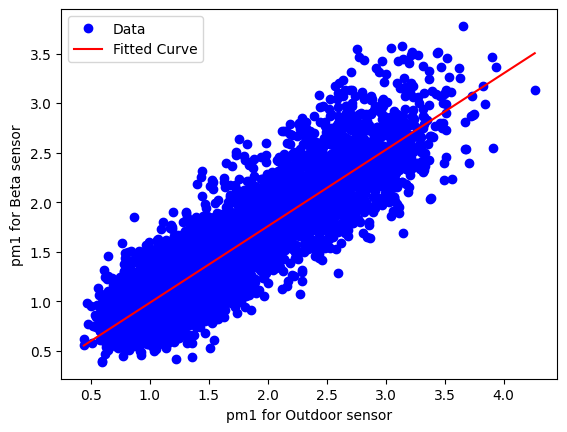

In [13]:
# plot of both the alpha(pm1) vs. Outdoor(pm1) and the beta(pm1) vs. Outdoor(pm1) sensor for fitting linear regression
fig = plt.figure()
ax = plt.subplot(111)

# linear regression equation
def linear_func(x, a, b):
    return a * x + b 

# r squared calculation
def r_squared(y, y_fit):
    
    ss_residuals = np.sum((y - y_fit)**2)
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_residuals / ss_total)
    return r2

# x-values for the fitted curve
x_fit = np.linspace(min(dfMod['pm1']), max(dfMod['pm1']), len(dfMod['pm1'])) 


# Fit the alpha vs. outdoor sensor data to a linear curve
alpha_popt, alpha_pcov = curve_fit(linear_func, dfMod['pm1'], dfAlp['pm1'][:len(dfMod['pm1'])])

# Generate y-values for the fitted curve using the optimized parameters
alpha_fit = linear_func(x_fit, *alpha_popt)  
# Calculate r2
alpha_r2 = r_squared(dfAlp['pm1'].values[:len(dfMod['pm1'])], linear_func(dfMod['pm1'], *alpha_popt))

# Plot the original data and the fitted curve
print("a =", alpha_popt[0], "b =", alpha_popt[1])
print("r2 =", alpha_r2)
plt.plot(dfMod['pm1'], dfAlp['pm1'][:len(dfMod['pm1'])], 'bo', label='Data')
plt.plot(x_fit, alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm1 for Outdoor sensor')
plt.ylabel('pm1 for Alpha sensor')
plt.show()


# Make a modified alpha dataset for pm1
Mod_dfAlp = dfAlp.copy()
Mod_dfAlp['pm1'] = dfAlp['pm1'] * 1/alpha_popt[0] - alpha_popt[1]

# Fit the beta vs. outdoor sensor data to a linear curve
pm1_beta_popt, beta_pcov = curve_fit(linear_func, dfMod['pm1'], dfBet['pm1'][:len(dfMod['pm1'])])
# Generate y-values for the fitted curve using the optimized parameters
beta_fit = linear_func(x_fit, *pm1_beta_popt)  

beta_r2 = r_squared(dfBet['pm1'].values[:len(dfMod['pm1'])], linear_func(dfMod['pm1'], *pm1_beta_popt))

# Plot the original data and the fitted curve
print("a =", pm1_beta_popt[0], "b =", pm1_beta_popt[1])
print("r2 =", beta_r2)
plt.plot(dfMod['pm1'], dfBet['pm1'][:len(dfMod['pm1'])], 'bo', label='Data')
plt.plot(x_fit, beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm1 for Outdoor sensor')
plt.ylabel('pm1 for Beta sensor')
plt.show()
# Make a modified beta dataset for pm1
Mod_dfBet = dfBet.copy()
Mod_dfBet['pm1'] = dfBet['pm1'] * 1/pm1_beta_popt[0] - pm1_beta_popt[1]


a =0.8816619929223362 b =0.12243643758113477
r2 =0.8190802841912221


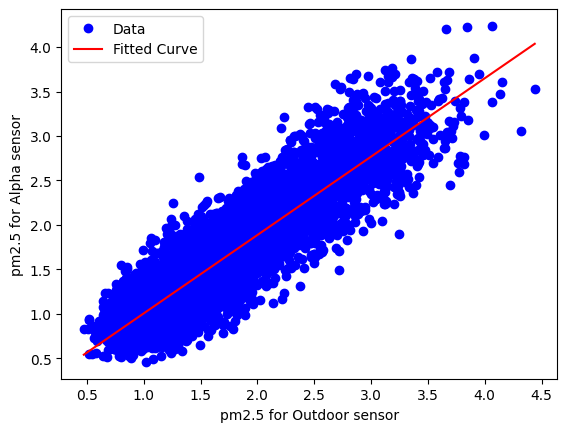

a =0.7792032094341181 b =0.22684120646439876
r2 =0.7904826717988921


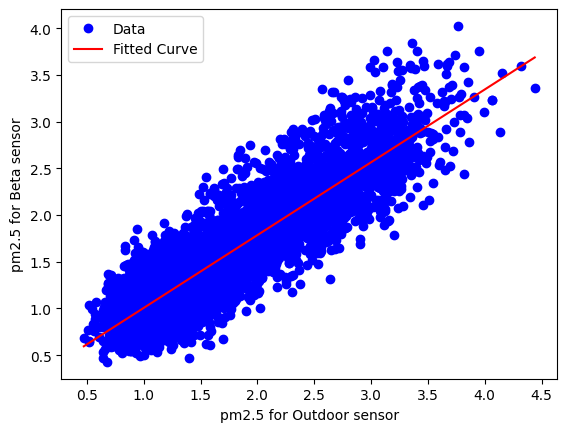

In [14]:
# plot of both the alpha(pm2.5) vs. Outdoor(pm2.5) and the beta(pm2.5) vs. Outdoor(pm2.5) sensor for fitting linear regression
fig = plt.figure()
ax = plt.subplot(111)


# x-values for the fitted curve
x_fit = np.linspace(min(dfMod['pm25']), max(dfMod['pm25']), len(dfMod['pm25'])) 
# Fit the alpha vs. outdoor sensor data to a linear curve
alpha_popt, alpha_pcov = curve_fit(linear_func, dfMod['pm25'], dfAlp['pm25'][:len(dfMod['pm25'])])


# Generate y-values for the fitted curve using the optimized parameters
alpha_fit = linear_func(x_fit, *alpha_popt) 
# Calculate r2
alpha_r2 = r_squared(dfAlp['pm25'].values[:len(dfMod['pm25'])], linear_func(dfMod['pm25'], *alpha_popt))
# Plot the original data and the fitted curve
print("a =" + str(alpha_popt[0]), "b =" + str(alpha_popt[1]))
print("r2 =" + str(alpha_r2))
plt.plot(dfMod['pm25'], dfAlp['pm25'][:len(dfMod['pm25'])], 'bo', label='Data')
plt.plot(x_fit, alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm2.5 for Outdoor sensor')
plt.ylabel('pm2.5 for Alpha sensor')
plt.show()
# Make a modified alpha dataset for pm2.5
Mod_dfAlp = dfAlp.copy()
Mod_dfAlp['pm25'] =dfAlp['pm25']*1/alpha_popt[0] - alpha_popt[1]





# Fit the beta vs. outdoor sensor data to a linear curve
beta_popt, beta_pcov = curve_fit(linear_func, dfMod['pm25'], dfBet['pm25'][:len(dfMod['pm25'])])
# Generate y-values for the fitted curve using the optimized parameters
beta_fit = linear_func(x_fit, *beta_popt)  
#Calculate r2
beta_r2 = r_squared(dfBet['pm25'].values[:len(dfMod['pm25'])], linear_func(dfMod['pm25'], *beta_popt))
# Plot the original data and the fitted curve
print("a =" + str(beta_popt[0]), "b =" + str(beta_popt[1]))
print("r2 =" + str(beta_r2))
plt.plot(dfMod['pm25'], dfBet['pm25'][:len(dfMod['pm25'])], 'bo', label='Data')
plt.plot(x_fit, beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm2.5 for Outdoor sensor')
plt.ylabel('pm2.5 for Beta sensor')
plt.show()
# Make a modified beta dataset for pm2.5
Mod_dfBet = dfBet.copy()
Mod_dfBet['pm25'] =dfBet['pm25']*1/beta_popt[0] - beta_popt[1]



a = 0.29663048801554953 b = 1.3815873824473834
r2 = 0.11829518525498428


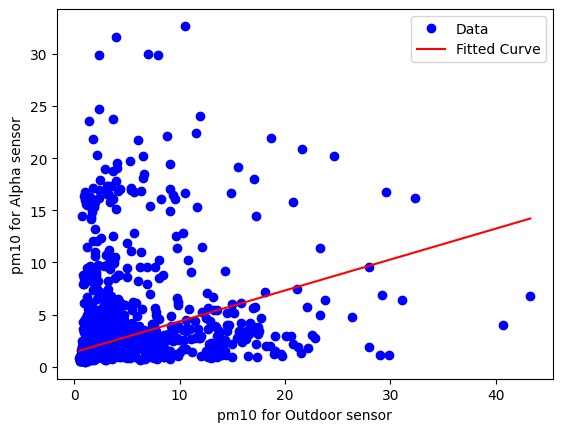

a = 0.43544096388685183 b = 1.0795072322453125
r2 = 0.2084605931479151


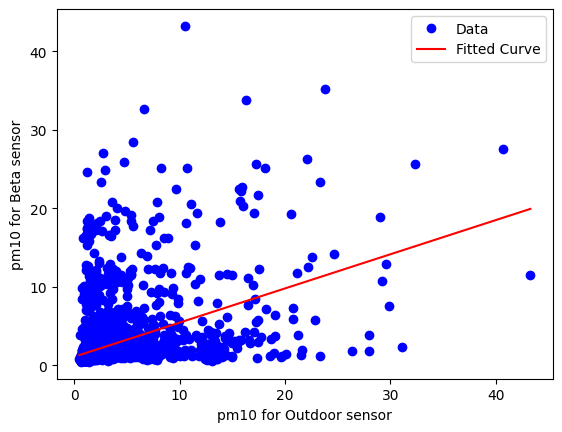

In [15]:
# plot of both the alpha(pm10) vs. Outdoor(pm10) and the beta(pm10) vs. Outdoor(pm10) sensor for fitting linear regression
fig = plt.figure()
ax = plt.subplot(111)



# x-values for the fitted curve
x_fit = np.linspace(min(dfMod['pm10']), max(dfMod['pm10']), len(dfMod['pm10'])) 

# Fit the alpha vs. outdoor sensor data to a linear curve
alpha_popt, alpha_pcov = curve_fit(linear_func, dfMod['pm10'], dfAlp['pm10'][:len(dfMod['pm10'])])
# Generate y-values for the fitted curve using the optimized parameters
alpha_fit = linear_func(x_fit, *alpha_popt)
# Calculate r2
alpha_r2 = r_squared(dfAlp['pm10'].values[:len(dfMod['pm10'])], linear_func(dfMod['pm10'], *alpha_popt))
# Plot the original data and the fitted curve
print("a =", alpha_popt[0], "b =", alpha_popt[1])
print("r2 =", alpha_r2)
plt.plot(dfMod['pm10'], dfAlp['pm10'][:len(dfMod['pm10'])], 'bo', label='Data')
plt.plot(x_fit, alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm10 for Outdoor sensor')
plt.ylabel('pm10 for Alpha sensor')
plt.show()

# Make a modified alpha dataset for pm10
Mod_dfAlp = dfAlp.copy()
Mod_dfAlp['pm10'] = dfAlp['pm10'] * 1 / alpha_popt[0] - alpha_popt[1]
# Fit the beta vs. outdoor sensor data to a linear curve
beta_popt, beta_pcov = curve_fit(linear_func, dfMod['pm10'], dfBet['pm10'][:len(dfMod['pm10'])])
# Generate y-values for the fitted curve using the optimized parameters
beta_fit = linear_func(x_fit, *beta_popt)
# Calculate r2
beta_r2 = r_squared(dfBet['pm10'].values[:len(dfMod['pm10'])], linear_func(dfMod['pm10'], *beta_popt))
# Plot the original data and the fitted curve
print("a =", beta_popt[0], "b =", beta_popt[1])
print("r2 =", beta_r2)
plt.plot(dfMod['pm10'], dfBet['pm10'][:len(dfMod['pm10'])], 'bo', label='Data')
plt.plot(x_fit, beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm10 for Outdoor sensor')
plt.ylabel('pm10 for Beta sensor')
plt.show()
# Make a modified beta dataset for pm10
Mod_dfBet = dfBet.copy()
Mod_dfBet['pm10'] = dfBet['pm10'] * 1 / beta_popt[0] - beta_popt[1]



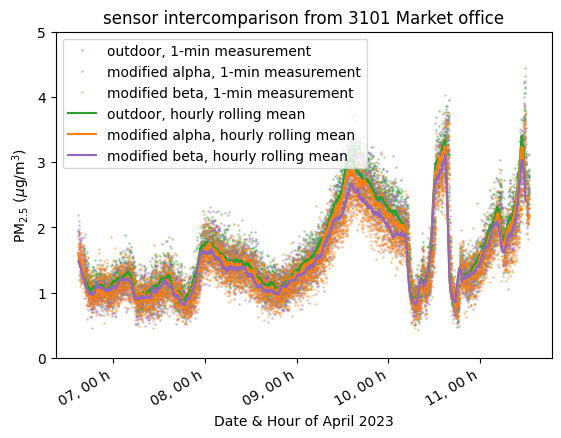

In [16]:
# modified data pm2.5
fig = plt.figure()
ax = plt.subplot(111)
# plot modified data for alpha and beta sensors against time for pm2.5 along with the outdoor sensor data
dfMod['pm25'].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
Mod_dfAlp['pm25'].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='modified alpha, 1-min measurement', alpha=0.3)
Mod_dfBet['pm25'].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='modified beta, 1-min measurement', alpha=0.3)
# finding a 60 min rolling mean for each sensor
dfMod['60 mean']=dfMod.pm25.rolling( 60).mean()
dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
Mod_dfAlp['60 mean']=Mod_dfAlp.pm25.rolling( 60).mean()
Mod_dfAlp['60 mean'].plot(color='tab:orange', label='modified alpha, hourly rolling mean')
Mod_dfBet['60 mean']=Mod_dfBet.pm25.rolling( 60).mean()
Mod_dfBet['60 mean'].plot(color='tab:purple', label='modified beta, hourly rolling mean')

ax.legend()

plt.ylim((0,5))
ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
plt.xlabel('Date & Hour of April 2023')
plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
#plt.show()

plt.savefig('initialTimeseries.pdf',dpi=300,)

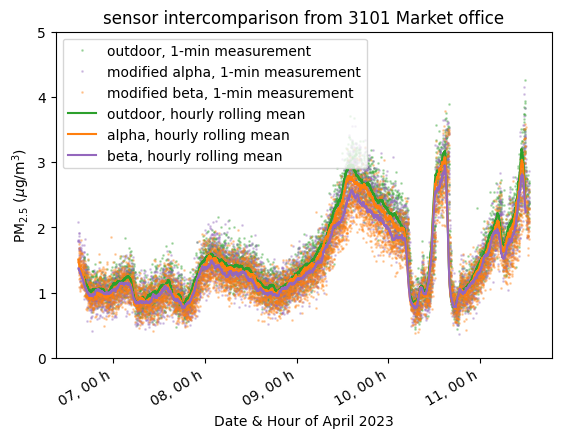

In [17]:
# modified data pm1
fig = plt.figure()
ax = plt.subplot(111)
# plot modified data for alpha and beta sensors against time for pm1 along with the outdoor sensor data
dfMod['pm1'].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
Mod_dfAlp['pm1'].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='modified alpha, 1-min measurement', alpha=0.3)
Mod_dfBet['pm1'].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='modified beta, 1-min measurement', alpha=0.3)

# finding a 60 min rolling mean for each sensor
dfMod['60 mean']=dfMod.pm1.rolling( 60).mean()
dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
Mod_dfAlp['60 mean']=Mod_dfAlp.pm1.rolling( 60).mean()
Mod_dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')
Mod_dfBet['60 mean']=Mod_dfBet.pm1.rolling( 60).mean()
Mod_dfBet['60 mean'].plot(color='tab:purple', label='beta, hourly rolling mean')

ax.legend()

plt.ylim((0,5))
ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
plt.xlabel('Date & Hour of April 2023')
plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
#plt.show()

plt.savefig('initialTimeseries.pdf',dpi=300,)

a =1.0253190141456594 b =-0.9969525088054191
r2 =0.9661379864228505


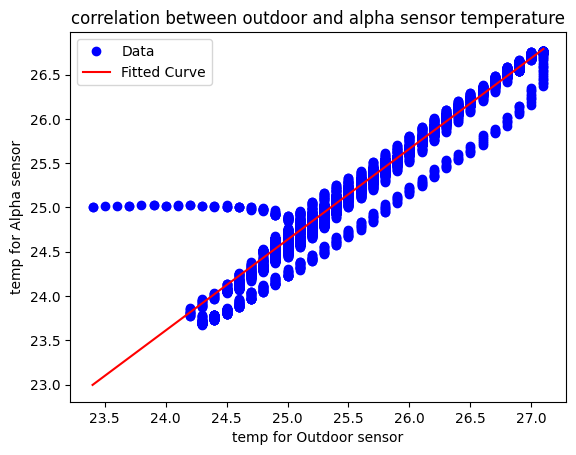

a = 0.9823885469289416 b = 0.2626529043056403
r2 = 0.9610365440737854


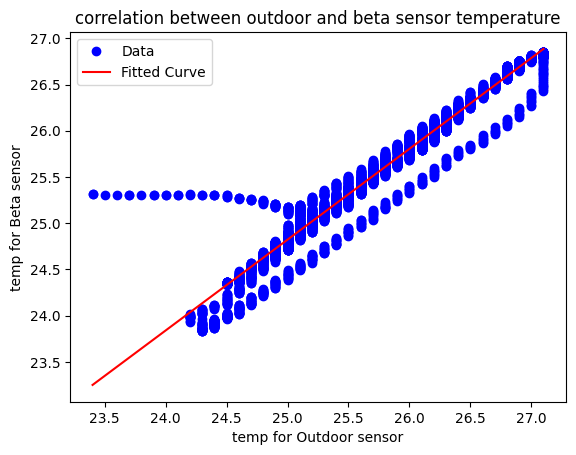

In [57]:
# finding the line of best fit as above but instead using temperature for each sensor
fig = plt.figure()
ax1 = plt.subplot(111)


temp_x_fit = np.linspace(min(dfMod['temp']), max(dfMod['temp']), len(dfMod['temp'])) 
temp_alpha_popt, temp_alpha_pcov = curve_fit(linear_func, dfMod['temp'], dfAlp['sample_temp'][:len(dfMod['temp'])])


temp_alpha_fit = linear_func(temp_x_fit, *temp_alpha_popt)  # Evaluate the curve function with optimized parameters
temp_alpha_r2 = r_squared(dfAlp['sample_temp'].values[:len(dfMod['temp'])], linear_func(dfMod['temp'], *temp_alpha_popt))

print("a =" + str(temp_alpha_popt[0]), "b =" + str(temp_alpha_popt[1]))
print("r2 =" + str(temp_alpha_r2))
plt.plot(dfMod['temp'], dfAlp['sample_temp'][:len(dfMod['temp'])], 'bo', label='Data')
plt.plot(temp_x_fit, temp_alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('temp for Outdoor sensor')
plt.ylabel('temp for Alpha sensor')
plt.title('correlation between outdoor and alpha sensor temperature')
plt.show()

Mod_dfAlp['sample_temp'] =dfAlp['sample_temp']*1/temp_alpha_popt[0] - temp_alpha_popt[1]

temp_x_fit = np.linspace(min(dfMod['temp']), max(dfMod['temp']), len(dfMod['temp']))
temp_beta_popt, temp_beta_pcov = curve_fit(linear_func, dfMod['temp'], dfBet['sample_temp'][:len(dfMod['temp'])])

temp_beta_fit = linear_func(temp_x_fit, *temp_beta_popt)  # Evaluate the curve function with optimized parameters
temp_beta_r2 = r_squared(dfBet['sample_temp'].values[:len(dfMod['temp'])], linear_func(dfMod['temp'], *temp_beta_popt))

print("a =", temp_beta_popt[0], "b =", temp_beta_popt[1])
print("r2 =", temp_beta_r2)
plt.plot(dfMod['temp'], dfBet['sample_temp'][:len(dfMod['temp'])], 'bo', label='Data')
plt.plot(temp_x_fit, temp_beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('temp for Outdoor sensor')
plt.ylabel('temp for Beta sensor')
plt.title('correlation between outdoor and beta sensor temperature')
plt.show()


Mod_dfBet['sample_temp'] =dfBet['sample_temp']*1/temp_beta_popt[0] - temp_beta_popt[1]


a = 0.992334165315187 b = 3.6756208835796715
r2 = 0.9954941710894756


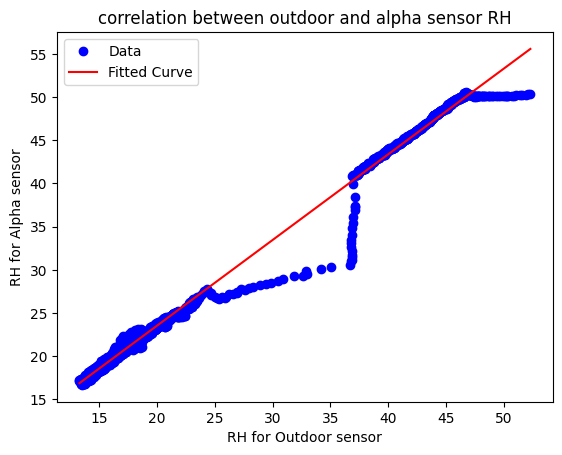

a = 0.9820411556026064 b = 3.487989697207372
r2 = 0.9923420638836836


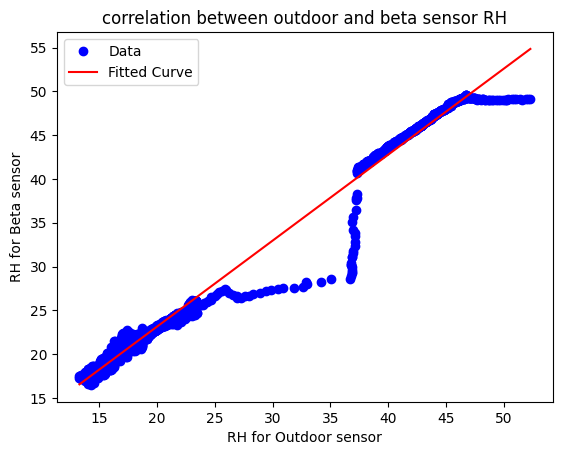

In [56]:
# doing the same as above but for humidity
fig = plt.figure()
ax1 = plt.subplot(111)

rh_x_fit = np.linspace(min(dfMod['rh']), max(dfMod['rh']), len(dfMod['rh'])) 
rh_alpha_popt, rh_alpha_pcov = curve_fit(linear_func, dfMod['rh'], dfAlp['sample_rh'][:len(dfMod['rh'])])

rh_alpha_fit = linear_func(rh_x_fit, *rh_alpha_popt)
rh_alpha_r2 = r_squared(dfAlp['sample_rh'].values[:len(dfMod['rh'])], linear_func(dfMod['rh'], *rh_alpha_popt))

print("a =", rh_alpha_popt[0], "b =", rh_alpha_popt[1])
print("r2 =", rh_alpha_r2)
plt.plot(dfMod['rh'], dfAlp['sample_rh'][:len(dfMod['rh'])], 'bo', label='Data')
plt.plot(rh_x_fit, rh_alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('RH for Outdoor sensor')
plt.ylabel('RH for Alpha sensor')
plt.title('correlation between outdoor and alpha sensor RH')
plt.show()

Mod_dfAlp['sample_rh'] = dfAlp['sample_rh'] * 1 / rh_alpha_popt[0] - rh_alpha_popt[1]

rh_x_fit = np.linspace(min(dfMod['rh']), max(dfMod['rh']), len(dfMod['rh']))
rh_beta_popt, rh_beta_pcov = curve_fit(linear_func, dfMod['rh'], dfBet['sample_rh'][:len(dfMod['rh'])])

rh_beta_fit = linear_func(rh_x_fit, *rh_beta_popt)
rh_beta_r2 = r_squared(dfBet['sample_rh'].values[:len(dfMod['rh'])], linear_func(dfMod['rh'], *rh_beta_popt))

print("a =", rh_beta_popt[0], "b =", rh_beta_popt[1])
print("r2 =", rh_beta_r2)
plt.plot(dfMod['rh'], dfBet['sample_rh'][:len(dfMod['rh'])], 'bo', label='Data')
plt.plot(rh_x_fit, rh_beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('RH for Outdoor sensor')
plt.ylabel('RH for Beta sensor')
plt.title('correlation between outdoor and beta sensor RH')
plt.show()

Mod_dfBet['sample_rh'] = dfBet['sample_rh'] * 1 / rh_beta_popt[0] - rh_beta_popt[1]


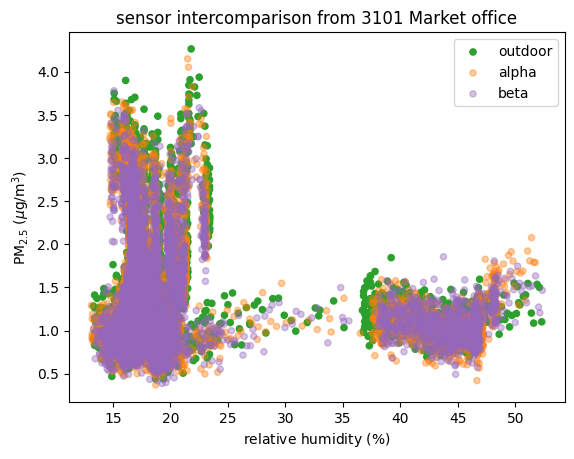

In [25]:
# plotting the modified data for humidity vs, pm2.5 for each sensor
ax1 = dfMod.plot(x="rh", y="pm1", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
Mod_dfAlp.plot(x="sample_rh", y="pm1", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
Mod_dfBet.plot(x="sample_rh", y="pm1", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot

plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

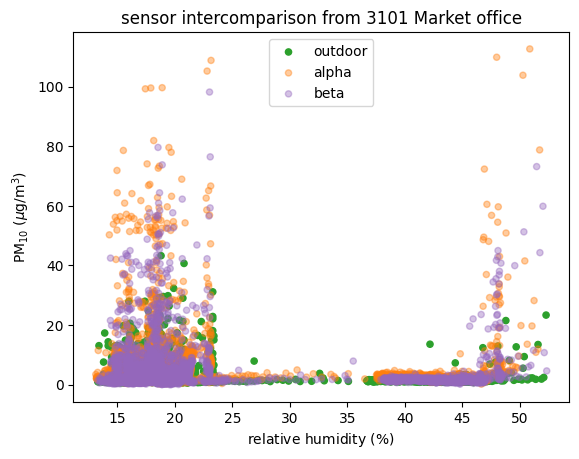

In [21]:
# plotting the modified data for humidity vs, pm10 for each sensor
ax1 = dfMod.plot(x="rh", y="pm10", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
Mod_dfAlp.plot(x="sample_rh", y="pm10", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
Mod_dfBet.plot(x="sample_rh", y="pm10", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
plt.ylabel(r'$\mathrm{PM}_{10}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

In [22]:
import scipy.stats as stats

# Define the metric to be tested
metric = 'pm10'
# Perform the independent samples t-test
if metric == 'rh' or metric == 'temp':
    _, p_value = stats.ttest_ind(Mod_dfBet[f'sample_{metric}'], dfMod[metric])

    _, p_value2 = stats.ttest_ind(Mod_dfAlp[f'sample_{metric}'], dfMod[metric])
else:
    _, p_value = stats.ttest_ind(Mod_dfBet[metric], dfMod[metric])
    _, p_value2 = stats.ttest_ind(Mod_dfAlp[metric], dfMod[metric])

# Check the p-value to determine significance

alpha = 0.05  # Significance level
if p_value < alpha:
    print("S "+str(p_value))
else:
    print("NS "+str(p_value)+",")
if p_value2 < alpha:
    print("S "+str(p_value2))
else:
    print("NS "+str(p_value2))

# S signifies significant difference, NS signifies no significant difference

S 1.1138304392031936e-86
S 4.391424346786861e-251


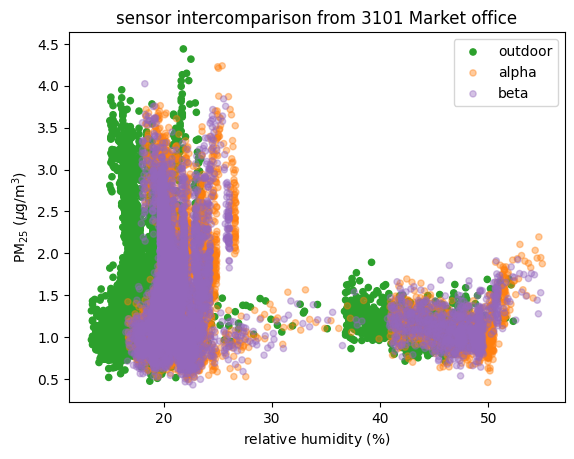

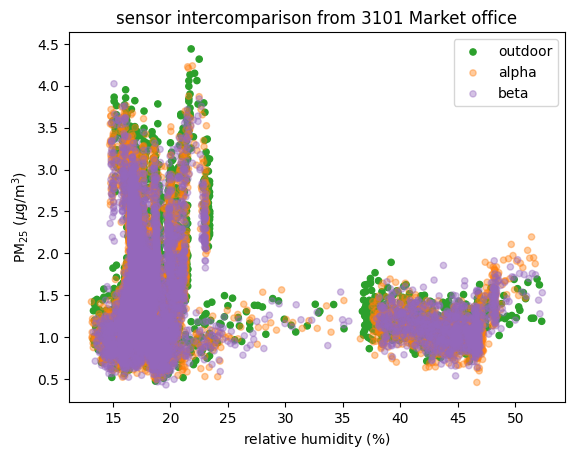

In [54]:
# plotting the modified data for humidity vs, pm10 for each sensor
x_parameter= 'rh'
ax1 = dfMod.plot(x=x_parameter, y="pm25", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_"+x_parameter, y="pm25", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_"+x_parameter, y="pm25", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
if x_parameter == 'rh':
    plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
    plt.ylabel(r'$\mathrm{PM}_{25}\ (\mu \mathrm{g / m}^{3})$')
elif x_parameter == 'temp': 
    plt.xlabel(r'$\mathrm{temperature}\ (\mathrm{^{\circ}C})$')

    plt.ylabel(r'$\mathrm{PM}_{25}\ (\mu \mathrm{g / m}^{3})$')

plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()


# plotting the modified data for humidity vs, pm10 for each sensor

ax1 = dfMod.plot(x=x_parameter, y="pm25", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
Mod_dfAlp.plot(x="sample_"+x_parameter, y="pm25", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
Mod_dfBet.plot(x="sample_"+x_parameter, y="pm25", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
if x_parameter == 'rh':
    plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
    plt.ylabel(r'$\mathrm{PM}_{25}\ (\mu \mathrm{g / m}^{3})$')
elif x_parameter == 'temp': 
    plt.xlabel(r'$\mathrm{temperature}\ (\mathrm{^{\circ}C})$')

    plt.ylabel(r'$\mathrm{PM}_{25}\ (\mu \mathrm{g / m}^{3})$')

plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()